# Requirement

1. นำ Iris data set มาทำการเปรียบขนาดความคล้ายครึง โดยใช้ Hierarchy clustering ของ
 
 - ความยาวและความกว้างของกลีบเลี้ยง
 - ความยาวและความกว้างของกลีบดอก 

และสรุปผลลัพธ์ที่ได้ออกมา เป็นการจำแนกได้ว่าความใกล้เคียงของดอกอยู่ประมาณไหน และให้ใช้ Rand Index, Entropy(Purity) ในการประเมิณ

In [2]:
import pandas as pd
Iris = pd.read_csv('data/Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
sepal = Iris[["SepalLengthCm","SepalWidthCm"]]
sepal

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [51]:
petal = Iris[["PetalLengthCm","PetalWidthCm"]]
petal

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


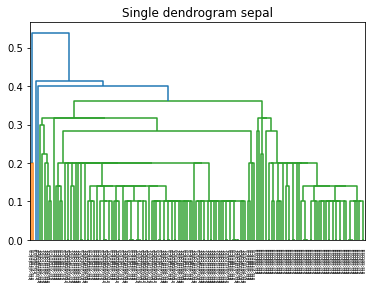

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

linkage_sepal = linkage(sepal, method='single', metric='euclidean')
dendrogram(linkage_sepal, labels=Iris['Species'].to_list())

plt.title('Single dendrogram sepal')
plt.show()

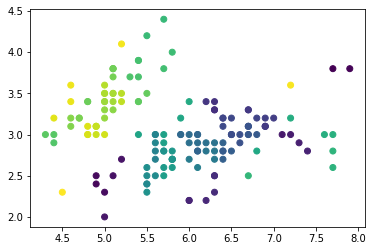

In [59]:
sepal_cls = fcluster(linkage_sepal, t=0, criterion='distance')
plt.scatter(sepal["SepalLengthCm"],sepal["SepalWidthCm"],c=sepal_cls)
plt.show()

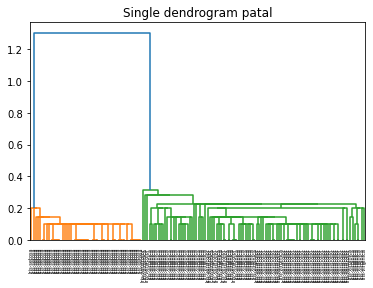

In [47]:
linkage_petal = linkage(petal, method='single', metric='euclidean')
dendrogram(linkage_petal, labels=Iris['Species'].to_list())

plt.title('Single dendrogram petal')
plt.show()

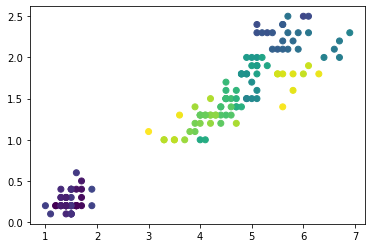

In [57]:
petal_cls = fcluster(linkage_petal, t=0, criterion='distance')
plt.scatter(petal["PetalLengthCm"],petal["PetalWidthCm"],c=petal_cls)
plt.show()

In [62]:
# Evaluation
# Rand index
from sklearn.metrics import cluster
sepal_rand_ind = cluster.rand_score(Iris['Species'],sepal_cls)
sepal_rand_ind

0.6722147651006711

In [63]:
petal_rand_ind = cluster.rand_score(Iris['Species'],petal_cls)
petal_rand_ind

0.6798210290827741

In [65]:
# Entropy
contingency_matrix = cluster.contingency_matrix(Iris['Species'],sepal_cls)
contingency_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
        1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1,
        1, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0,
        1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [67]:
import numpy as np
mij = contingency_matrix
mi = contingency_matrix.sum(axis=0)
pij = mij/mi

log2pij = np.log2(pij,out=np.zeros_like(pij), where=(pij!=0))
print(pij.round(2))
print(log2pij.round(2))

ei = pij*log2pij
ei = -1*ei.sum(axis=0)
print('e_i \n', ei.round(2))

m = contingency_matrix.sum()

entropy = ((mi/m)*ei).sum()
print('entropy =', entropy )

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   0.   1.  ]
 [0.   0.   1.   0.   1.   1.   1.   1.   0.   0.   0.   0.   0.5  1.
  1.   0.5  0.5  0.   0.   0.   0.33 1.   0.   0.   0.5  0.   0.   0.
  1.   1.   0.67 0.5  0.   0.   1.   0.   1.   1.   0.5  0.5  0.   1.
  1.   1.   0.   0.   0.   0.   1.   0.   1.   0.   1.   1.   1.   1.
  1.   1.   1.   1.   0.5  0.   1.   1.   0.   1.   1.   1.   1.   1.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

In [69]:
# Purity
purity_sepal = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
purity_sepal

0.9266666666666666

In [70]:
# contingency_matrix
contingency_matrix = cluster.contingency_matrix(Iris['Species'],petal_cls)

# Entropy
mij = contingency_matrix
mi = contingency_matrix.sum(axis=0)
pij = mij/mi

log2pij = np.log2(pij,out=np.zeros_like(pij), where=(pij!=0))
print(pij.round(2))
print(log2pij.round(2))

ei = pij*log2pij
ei = -1*ei.sum(axis=0)
print('e_i \n', ei.round(2))

m = contingency_matrix.sum()

entropy = ((mi/m)*ei).sum()
print('entropy =', entropy)

# Purity
purity_petal = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
print('petal =', purity_petal)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.   0.   0.   1.   1.   0.   0.33 0.   0.   0.
  0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   0.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   